In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Import the data and create the archor date column

### 1.1.1 Import the dataset and identify number of rows

In [2]:
txn = pd.read_csv("Retail_Data_Transactions.csv")

In [3]:
txn.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [4]:
number_of_rows = len(txn.index)
print(number_of_rows)

125000


### 1.1.2 Create a new column of date

In [5]:
txn['txn_date'] = pd.to_datetime(txn['trans_date'])
txn.head()

,customer_id,trans_date,tran_amount,txn_date
0,CS5295,11-Feb-13,35,2013-02-11
1,CS4768,15-Mar-15,39,2015-03-15
2,CS2122,26-Feb-13,52,2013-02-26
3,CS1217,16-Nov-11,99,2011-11-16
4,CS1850,20-Nov-13,78,2013-11-20


In [6]:
txn.drop(['trans_date'], axis=1, inplace=True)
txn.head()

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20


### 1.1.3 Identify the min and max date

In [7]:
# min() of column 'txn_date'
print(txn['txn_date'].min())

2011-05-16 00:00:00


In [8]:
# max() of column 'txn_date'
print(txn['txn_date'].max())

2015-03-16 00:00:00


### 1.1.4 Create column 'ME_DT' as last day of month

In [9]:
from pandas.tseries.offsets import MonthEnd
txn['ME_DT'] = txn['txn_date'] + MonthEnd(0)
txn.head()

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30


### 1.1.5 Create column 'YEAR'

In [10]:
txn['YEAR'] = txn['txn_date'].dt.year

In [11]:
txn.iloc[55:60,:]

,customer_id,tran_amount,txn_date,ME_DT,YEAR
55,CS2662,88,2014-08-31,2014-08-31,2014
56,CS2209,35,2012-03-12,2012-03-31,2012
57,CS4530,40,2011-06-05,2011-06-30,2011
58,CS2848,53,2013-02-04,2013-02-28,2013
59,CS2596,55,2011-09-19,2011-09-30,2011


## 1.2 Create features that capture annual spending

### 1.2.1 Create clnt_annual_aggregations

In [12]:
clnt_annual_aggregations = txn.groupby(['customer_id','YEAR']).agg(
    ann_txn_amt_sum = pd.NamedAgg('tran_amount', 'sum'),
    ann_txn_amt_ave = pd.NamedAgg('tran_amount', 'mean'),
    ann_txn_amt_std = pd.NamedAgg('tran_amount', 'std'),
    ann_txn_amt_var = pd.NamedAgg('tran_amount', 'var'),
    ann_txn_amt_sem = pd.NamedAgg('tran_amount', 'sem'),
    ann_txn_amt_max = pd.NamedAgg('tran_amount', 'max'),
    ann_txn_amt_min = pd.NamedAgg('tran_amount', 'min'),
    ann_txn_cnt = pd.NamedAgg('tran_amount', 'count')
)

In [13]:
clnt_annual_aggregations.head()

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   

                  ann_txn_amt_min  ann_txn_cnt  
customer_id YEAR                                
CS1112      2011               56            3  
            2012               52            5  
            2013               36            3  
            2014               59            3  
            2015               39            1

### 1.2.2 Plot histogram of sum and count

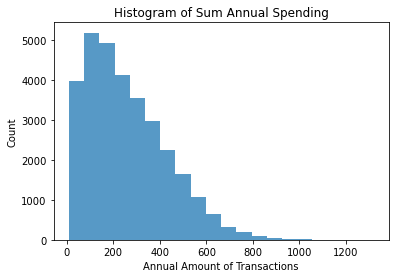

In [14]:
# Plot sum
fig = plt.figure()
plt.hist(clnt_annual_aggregations['ann_txn_amt_sum'],bins=20,alpha=0.75)
plt.title('Histogram of Sum Annual Spending')
plt.xlabel('Annual Amount of Transactions')
plt.ylabel('Count')
plt.show()

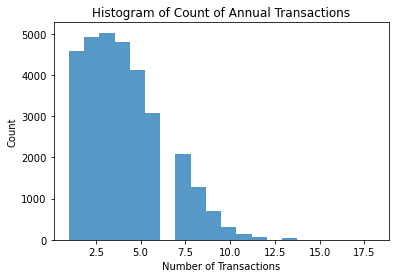

In [15]:
# Plot count
fig = plt.figure()
plt.hist(clnt_annual_aggregations['ann_txn_cnt'],bins=20,alpha=0.75)
plt.title('Histogram of Count of Annual Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Count')
plt.show()

### 1.2.3 Create clnt_annual_aggregations_pivot table with 40 columns

In [16]:
# create pivot table
clnt_annual_aggregations_pivot = clnt_annual_aggregations.unstack(level=1)

In [17]:
# sort column names alphabetically
clnt_annual_aggregations_pivot = clnt_annual_aggregations_pivot.reindex(sorted(clnt_annual_aggregations_pivot.columns), axis=1)

In [18]:
# fillna of 0
clnt_annual_aggregations_pivot = clnt_annual_aggregations_pivot.fillna(0)

In [19]:
clnt_annual_aggregations_pivot.head()

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   

            ann_txn_amt_max                            ... ann_txn_amt_var  \
YEAR                   2011   2012   2013  2014  2015  ...            2011   
customer_id                                            ...                   
CS1112                 96.0   81.0  105.0  90.0  39.0  ...      485.333333   
CS1113                 94.0   95.0   97.0  97.0  98.0  ...      444.333333   
CS1114                 97.0   97.0  105.0  95.0  79.0  ...       94.700000   
CS1115                102.0  104.0   94.0  98.0  55.0  ...      225.000000   
CS1116                 87.0  105.0   59.0  96.0   0.0  ...      449.583333   

                                                             ann_txn_cnt       \
YEAR               2012         2013        2014        2015        2011 2012   
customer_id                                                                     
CS1112       161.800000  1190.333333  284.333333    0.000000         3.0  5.0   
CS1113       290.200000   171.200000  781.666667  745.333333         3.0  5.0   
CS1114       968.000000   619.300000  726.166667    0.000000         5.0  2.0   
CS1115       477.285714   110.952381  512.250000    0.000000         3.0  7.0   
CS1116       908.333333     0.000000  636.800000    0.000000         4.0  3.0   

                            
YEAR        2013 2014 2015  
customer_id                 
CS1112       3.0  3.0  1.0  
CS1113       5.0  4.0  3.0  
CS1114       5.0  6.0  1.0  
CS1115       7.0  4.0  1.0  
CS1116       1.0  5.0  0.0  

[5 rows x 40 columns]

The 40 columns are 5 years and 8 aggregations per year. I select the fillna value of 0. NA value appears when client did not make a transaction in that year. Or the NA value occurs when there is a single transaction in that year, so it is unable to compute standard deviation, variance and standard error. 

### 1.2.4 Multi-index

In [20]:
clnt_annual_aggregations_pivot.columns.nlevels

2

In [21]:
clnt_annual_aggregations_pivot.columns

MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt_std', 2011),
            ('ann_txn_amt_std', 2012),
            ('ann_txn_amt_std', 2013),
            ('ann_txn_amt_std', 2014),
            ('ann_txn_amt_std', 2015),
            ('ann_txn_amt

There are two levels of column indexes. The first level is aggregation and the second level is year. The column names are broken down to second level, with the format of “first level, second level”. 

### 1.2.5 Save as Excel file

In [22]:
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1

Level_0 saves the first level column names, and level_1 saves the second level column names. Finally, level_0 and level_1 has been concatenated and replaced as a single level column names in the pivot table. 

In [23]:
clnt_annual_aggregations_pivot.head()

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,...,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015,ann_txn_cnt_2011,ann_txn_cnt_2012,ann_txn_cnt_2013,ann_txn_cnt_2014,ann_txn_cnt_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,96.0,81.0,105.0,90.0,39.0,...,485.333333,161.800000,1190.333333,284.333333,0.000000,3.0,5.0,3.0,3.0,1.0
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,94.0,95.0,97.0,97.0,98.0,...,444.333333,290.200000,171.200000,781.666667,745.333333,3.0,5.0,5.0,4.0,3.0
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,97.0,97.0,105.0,95.0,79.0,...,94.700000,968.000000,619.300000,726.166667,0.000000,5.0,2.0,5.0,6.0,1.0
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,102.0,104.0,94.0,98.0,55.0,...,225.000000,477.285714,110.952381,512.250000,0.000000,3.0,7.0,7.0,4.0,1.0
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,87.0,105.0,59.0,96.0,0.0,...,449.583333,908.333333,0.000000,636.800000,0.000000,4.0,3.0,1.0,5.0,0.0


In [24]:
clnt_annual_aggregations_pivot.to_excel('annual_features.xlsx')

### 1.2.6 Disadvantages in capturing client transaction

We are capturing aggregations by years. In this case, we can observe a trend of increasing or decreasing. However, some characteristics like seasonality is missing. A further feature generation according to month could help address that. 

## 1.3 Create monthly aggregations

### 1.3.1 Create dataframe that captures the monthly sum and count of transactions per client

In [25]:
clnt_monthly_aggregations = txn.groupby(['customer_id','ME_DT']).agg(
    mth_txn_amt_sum = pd.NamedAgg('tran_amount', 'sum'),
    mth_txn_cnt = pd.NamedAgg('tran_amount', 'count')
)

In [26]:
clnt_monthly_aggregations.head()

mth_txn_amt_sum  mth_txn_cnt
customer_id ME_DT                                   
CS1112      2011-06-30               56            1
            2011-08-31               96            1
            2011-10-31               60            1
            2012-04-30               56            1
            2012-06-30               52            1

In [27]:
clnt_monthly_aggregations.loc['CS1112']

,mth_txn_amt_sum,mth_txn_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


### 1.3.2 Create histogram of both columns

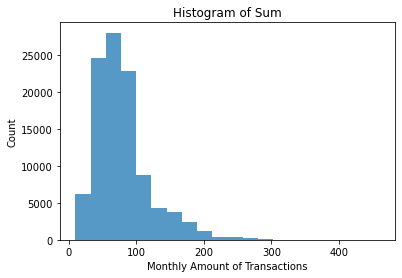

In [28]:
# Plot sum
fig = plt.figure()
plt.hist(clnt_monthly_aggregations['mth_txn_amt_sum'],bins=20,alpha=0.75)
plt.title('Histogram of Sum')
plt.xlabel('Monthly Amount of Transactions')
plt.ylabel('Count')
plt.show()

In [29]:
clnt_monthly_aggregations['mth_txn_amt_sum'].describe()

count    103234.000000
mean         78.694897
std          41.529152
min          10.000000
25%          50.000000
50%          72.000000
75%          95.000000
max         460.000000
Name: mth_txn_amt_sum, dtype: float64

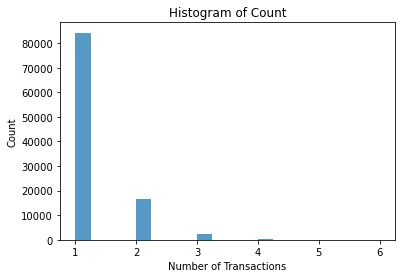

In [30]:
# Plot count
fig = plt.figure()
plt.hist(clnt_monthly_aggregations['mth_txn_cnt'],bins=20,alpha=0.75)
plt.title('Histogram of Count')
plt.xlabel('Number of Transactions')
plt.ylabel('Count')
plt.show()

In [31]:
clnt_monthly_aggregations['mth_txn_cnt'].describe()

count    103234.000000
mean          1.210841
std           0.475437
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: mth_txn_cnt, dtype: float64

From the histogram of monthly sum, the distribution is left skewed. The most common value falls between 50 and 75 dollars. The maximum transaction is \\$460. Most of the customers made one transaction in each month, the highest number of monthly transactions is six times. Compared with the histogram of annual count, it seems most of customers only shop less than six times per year. Thus, it means that some of them don't shop for every month. Meanwhile, although the max transaction for monthly is \\$460, but max annual transaction is slightly over \\$1000. It implies that the high transaction does not occur frequently. 

## 1.4 Create the base table for the rolling window features

### 1.4.1 Create numpy array of customer id and month end date

In [32]:
clnt_no = txn['customer_id'].unique()
len(clnt_no)

6889

In [33]:
me_dt = txn['ME_DT'].unique()
len(me_dt)

47

### 1.4.2 Generate all possible combinations of customer id and ME_DT

In [34]:
from itertools import product
base_table = product(clnt_no, me_dt)

In [35]:
type(base_table)

itertools.product

### 1.4.3 Convert to pandas dataframe

In [36]:
base_table_pd = pd.DataFrame.from_records(base_table, columns=['CLNT_NO', 'ME_DT'])

In [37]:
base_table_pd.head()

,CLNT_NO,ME_DT
0,CS5295,2013-02-28
1,CS5295,2015-03-31
2,CS5295,2011-11-30
3,CS5295,2013-11-30
4,CS5295,2014-03-31


### 1.4.4 Validate table

In [38]:
pd.DataFrame(base_table_pd[base_table_pd['CLNT_NO']=='CS1112'])

,CLNT_NO,ME_DT
157027,CS1112,2013-02-28
157028,CS1112,2015-03-31
157029,CS1112,2011-11-30
157030,CS1112,2013-11-30
157031,CS1112,2014-03-31
157032,CS1112,2012-02-29
157033,CS1112,2015-01-31
157034,CS1112,2013-01-31
157035,CS1112,2013-08-31
157036,CS1112,2013-07-31


In [39]:
# min date
print(base_table_pd[base_table_pd['CLNT_NO']=='CS1112']['ME_DT'].min())

2011-05-31 00:00:00


In [40]:
# max date 
print(base_table_pd[base_table_pd['CLNT_NO']=='CS1112']['ME_DT'].max())

2015-03-31 00:00:00


In [41]:
len(pd.DataFrame(base_table_pd[base_table_pd['CLNT_NO']=='CS1112']))

47

The dates fall between the min and max month-dates, and there are 47 rows of client CS1112. 

In [42]:
print('Number of rows: %d' %base_table_pd.shape[0])

Number of rows: 323783


In [43]:
print('Number of unique clients: %d' %len(base_table_pd['CLNT_NO'].unique()))

Number of unique clients: 6889


In [44]:
print('Number of unique month-end date %d'%len(base_table_pd['ME_DT'].unique()))

Number of unique month-end date 47


## 1.5 Create the monthly rolling window features

### 1.5.1 Left join the base table pd with the clnt monthly aggregations table

In [45]:
len(base_table_pd)

323783

In [46]:
base_clnt_mth=base_table_pd.join(clnt_monthly_aggregations,on=['CLNT_NO','ME_DT'],how='left')

There are NaN values because some client did not process any transaction in that month. I would fill the NaN values with 0. 

In [47]:
base_clnt_mth=base_clnt_mth.fillna(0)

In [48]:
len(base_clnt_mth)

323783

Yes, there are exact rows as expected of 323783 rows.

In [49]:
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,0.0,0.0
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0


In [50]:
clnt_monthly_aggregations

mth_txn_amt_sum  mth_txn_cnt
customer_id ME_DT                                   
CS1112      2011-06-30               56            1
            2011-08-31               96            1
            2011-10-31               60            1
            2012-04-30               56            1
            2012-06-30               52            1
...                                 ...          ...
CS9000      2014-01-31               16            1
            2014-05-31               20            1
            2014-07-31               26            1
            2014-08-31               35            1
            2015-02-28               34            1

[103234 rows x 2 columns]

The clnt_monthly_aggregations has less rows because it only contains the month, sum and count that client makes transactions. The base_table_pd is an itertools product of client and month-end dates. In clnt_monthly_aggregations, customer_id and ME_DT are indexes. After joining with base_table_pd, they become columns in base_clnt_mth. 

### 1.5.2 Create the order for rolling windows 

In [51]:
base_clnt_mth.sort_values(by=['CLNT_NO','ME_DT'],inplace=True)

In [52]:
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
295140,CS9000,2014-11-30,0.0,0.0
295126,CS9000,2014-12-31,0.0,0.0
295119,CS9000,2015-01-31,0.0,0.0
295136,CS9000,2015-02-28,34.0,1.0


### 1.5.3 Rolling window 

In [53]:
rolling_features_3M = base_clnt_mth.groupby('CLNT_NO').rolling(3).agg({'mth_txn_amt_sum':['sum','mean','max'],
                                                                       'mth_txn_cnt' : ['sum','mean','max']})

In [54]:
rolling_features_3M.head()

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044            56.0  18.666667  56.0         1.0  0.333333  1.0
        157069           152.0  50.666667  96.0         2.0  0.666667  1.0
        157060            96.0  32.000000  96.0         1.0  0.333333  1.0

In [55]:
rolling_features_6M = base_clnt_mth.groupby('CLNT_NO').rolling(6).agg({'mth_txn_amt_sum':['sum','mean','max'],
                                                                       'mth_txn_cnt' : ['sum','mean','max']})

In [56]:
rolling_features_12M = base_clnt_mth.groupby('CLNT_NO').rolling(12).agg({'mth_txn_amt_sum':['sum','mean','max'],
                                                                       'mth_txn_cnt' : ['sum','mean','max']})

The 3-month rolling window has two rows of NaN, 6-month rolling window has five rows of NaN, and 12-month rolling window has eleven rows of NaN. The NaN occurs when there are not enough rows to perform aggregations. 

In [57]:
# level of columns 
rolling_features_3M.columns.nlevels

2

In [58]:
# level of index 
rolling_features_3M.index.nlevels

2

They are two levels for both index and columns. So they are MultiIndex dataframes. 

In [59]:
# rolling window of 3 months 
rolling_features_3M.columns = rolling_features_3M.columns.to_flat_index()

In [60]:
rolling_features_3M.rename(columns={('mth_txn_amt_sum', 'sum'):'amt_sum_3M',
                                   ('mth_txn_amt_sum', 'mean'):'amt_mean_3M',
                                   ('mth_txn_amt_sum', 'max'):'amt_max_3M',
                                   ('mth_txn_cnt', 'sum'):'txn_cnt_sum_3M',
                                   ('mth_txn_cnt', 'mean'):'txn_cnt_mean_3M',
                                   ('mth_txn_cnt', 'max'):'txn_cnt_max_3M'
              },inplace=True)

In [61]:
rolling_features_3M.head()

amt_sum_3M  amt_mean_3M  amt_max_3M  txn_cnt_sum_3M  \
CLNT_NO                                                               
CS1112  157064         NaN          NaN         NaN             NaN   
        157058         NaN          NaN         NaN             NaN   
        157044        56.0    18.666667        56.0             1.0   
        157069       152.0    50.666667        96.0             2.0   
        157060        96.0    32.000000        96.0             1.0   

                txn_cnt_mean_3M  txn_cnt_max_3M  
CLNT_NO                                          
CS1112  157064              NaN             NaN  
        157058              NaN             NaN  
        157044         0.333333             1.0  
        157069         0.666667             1.0  
        157060         0.333333             1.0

In [62]:
# rolling window of 6 months 
rolling_features_6M.columns = rolling_features_6M.columns.to_flat_index()
rolling_features_6M.rename(columns={('mth_txn_amt_sum', 'sum'):'amt_sum_6M',
                                   ('mth_txn_amt_sum', 'mean'):'amt_mean_6M',
                                   ('mth_txn_amt_sum', 'max'):'amt_max_6M',
                                   ('mth_txn_cnt', 'sum'):'txn_cnt_sum_6M',
                                   ('mth_txn_cnt', 'mean'):'txn_cnt_mean_6M',
                                   ('mth_txn_cnt', 'max'):'txn_cnt_max_6M'
              },inplace=True)

In [63]:
# rolling window of 12 months 
rolling_features_12M.columns = rolling_features_12M.columns.to_flat_index()
rolling_features_12M.rename(columns={('mth_txn_amt_sum', 'sum'):'amt_sum_12M',
                                   ('mth_txn_amt_sum', 'mean'):'amt_mean_12M',
                                   ('mth_txn_amt_sum', 'max'):'amt_max_12M',
                                   ('mth_txn_cnt', 'sum'):'txn_cnt_sum_12M',
                                   ('mth_txn_cnt', 'mean'):'txn_cnt_mean_12M',
                                   ('mth_txn_cnt', 'max'):'txn_cnt_max_12M'
              },inplace=True)

### 1.5.4 Merge the 4 tables 

In [64]:
rolling_features_3M = rolling_features_3M.droplevel("CLNT_NO")

In [65]:
rolling_features_6M = rolling_features_6M.droplevel("CLNT_NO")

In [84]:
rolling_features_6M

,amt_sum_6M,amt_mean_6M,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M
157064,NaN,NaN,NaN,NaN,NaN,NaN
157058,NaN,NaN,NaN,NaN,NaN,NaN
157044,NaN,NaN,NaN,NaN,NaN,NaN
157069,NaN,NaN,NaN,NaN,NaN,NaN
157060,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
295140,61.0,10.166667,35.0,2.0,0.333333,1.0
295126,61.0,10.166667,35.0,2.0,0.333333,1.0
295119,35.0,5.833333,35.0,1.0,0.166667,1.0
295136,34.0,5.666667,34.0,1.0,0.166667,1.0


In [66]:
rolling_features_12M = rolling_features_12M.droplevel("CLNT_NO")

In [88]:
all_rolling_features = base_clnt_mth.merge(rolling_features_3M, how='left',on=base_clnt_mth.index)
all_rolling_features.drop(columns='key_0',inplace=True)

In [89]:
all_rolling_features = all_rolling_features.merge(rolling_features_6M, how='left',on=base_clnt_mth.index)
all_rolling_features.drop(columns='key_0',inplace=True)

In [90]:
all_rolling_features = all_rolling_features.merge(rolling_features_12M, how='left',on=base_clnt_mth.index)
all_rolling_features.drop(columns='key_0',inplace=True)

In [91]:
all_rolling_features.head(20)

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
0,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CS1112,2011-10-31,60.0,1.0,156.0,52.000000,96.0,2.0,0.666667,1.0,...,96.0,3.0,0.500000,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,CS1112,2011-11-30,0.0,0.0,60.0,20.000000,60.0,1.0,0.333333,1.0,...,96.0,3.0,0.500000,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,CS1112,2011-12-31,0.0,0.0,60.0,20.000000,60.0,1.0,0.333333,1.0,...,96.0,2.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,CS1112,2012-01-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,96.0,2.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,CS1112,2012-02-29,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,60.0,1.0,0.166667,1.0,NaN,NaN,NaN,NaN,NaN,NaN


The output dataframe has 323,783 rows and 22 columns. 

### 1.5.5 Convert to Excel sheet

In [92]:
all_rolling_features.to_excel('mth_rolling_features.xlsx',index=False)

## 1.6 Date-related features: date of the week

### 1.6.1 Create the date-related features

In [71]:
txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn['day_name'] = txn['txn_date'].dt.day_name()

In [72]:
txn.head()

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday


### 1.6.2 Plot the histogram of count of transactions per day of the week

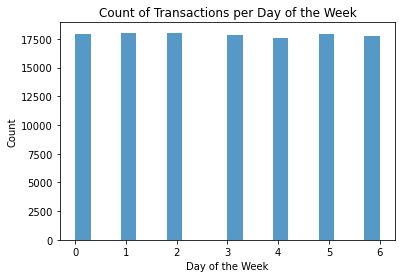

In [73]:
fig = plt.figure()
plt.hist(txn['day_of_the_week'],bins=20,alpha=0.75)
plt.title('Count of Transactions per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

### 1.6.3 Groupby and Count 

In [74]:
# groupby and count 
date_related_aggregations = txn.groupby(['customer_id','YEAR','day_name'])['tran_amount'].count()

In [75]:
# create pivot table 
date_related_aggregations = date_related_aggregations.unstack(level=1) 

In [76]:
date_related_aggregations = date_related_aggregations.unstack(level=1) 

In [77]:
date_related_aggregations.fillna(0,inplace=True)

In [78]:
# intermediate dataframe
date_related_aggregations.head()

YEAR          2011                                                     2012  \
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112         1.0    0.0      0.0    1.0      0.0     0.0       1.0    0.0   
CS1113         1.0    1.0      0.0    1.0      0.0     0.0       0.0    2.0   
CS1114         0.0    1.0      0.0    1.0      1.0     0.0       2.0    0.0   
CS1115         0.0    0.0      1.0    1.0      0.0     0.0       1.0    1.0   
CS1116         1.0    1.0      0.0    0.0      1.0     1.0       0.0    1.0   

YEAR                         ...     2014                     2015         \
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112         0.0      1.0  ...      1.0     1.0       1.0    0.0    0.0   
CS1113         1.0      0.0  ...      0.0     3.0       0.0    0.0    2.0   
CS1114         0.0      1.0  ...      0.0     1.0       1.0    0.0    0.0   
CS1115         1.0      0.0  ...      2.0     0.0       2.0    0.0    0.0   
CS1116         0.0      0.0  ...      0.0     0.0       0.0    0.0    0.0   

YEAR                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112           0.0    0.0      0.0     0.0       1.0  
CS1113           0.0    0.0      0.0     0.0       1.0  
CS1114           0.0    0.0      1.0     0.0       0.0  
CS1115           0.0    0.0      1.0     0.0       0.0  
CS1116           0.0    0.0      0.0     0.0       0.0  

[5 rows x 35 columns]

In [79]:
level_0 = date_related_aggregations.columns.get_level_values(0).astype(str)
level_1 = date_related_aggregations.columns.get_level_values(1).astype(str)
date_related_aggregations.columns = 'cnt_'+ level_0 + '_' + level_1

In [80]:
date_related_aggregations = date_related_aggregations.astype(int)

In [81]:
# final dataframe
date_related_aggregations.head()

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,...,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,...,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,...,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.6.4 Check rows and save as Excel

In [82]:
# check on equal number of nows 
# they two tables have the same number of rows
len(date_related_aggregations)

6889

There are same rows as in 1.2. 

In [83]:
# save to Excel
date_related_aggregations.to_excel('annual_day_of_week_counts_pivot.xlsx')

There are 35 features/columns in this section.

### 1.6.5 Generate features according to month-end-date and day of the week

In [84]:
# groupby and count
month_end_aggregations = txn.groupby(['customer_id','ME_DT','day_name'])['tran_amount'].count()

In [85]:
# unstack day name 
month_end_aggregations = month_end_aggregations.unstack(level=2) 

In [86]:
# fill na with 0 
month_end_aggregations.fillna(0,inplace=True)

In [87]:
# rename column names 
month_end_aggregations.columns = 'cnt_' + month_end_aggregations.columns.values

In [88]:
# set values to integer 
month_end_aggregations = month_end_aggregations.astype(int)

In [89]:
# display the results 
month_end_aggregations.head()

cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30           0           0             0           0   
            2011-08-31           1           0             0           0   
            2011-10-31           0           0             0           1   
            2012-04-30           0           0             0           1   
            2012-06-30           0           0             0           1   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30             0            0              1  
            2011-08-31             0            0              0  
            2011-10-31             0            0              0  
            2012-04-30             0            0              0  
            2012-06-30             0            0              0

### 1.6.6 Save as Excel

In [90]:
# NaN values have been filled with 0 
mth_day_counts = base_table_pd.join(month_end_aggregations, on = ["CLNT_NO", "ME_DT"])
mth_day_counts = mth_day_counts.sort_values(by = ["CLNT_NO","ME_DT"]).fillna(0)
mth_day_counts.head()

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
157064,CS1112,2011-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157058,CS1112,2011-06-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0
157044,CS1112,2011-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157069,CS1112,2011-08-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0
157060,CS1112,2011-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# Save to Excel 
month_end_aggregations.to_excel('mth_day_counts.xlsx')

## 1.7 Date-related features: days since last transaction

### 1.7.1 Capture last transaction for every client and month

In [92]:
last_monthly_purchase = pd.DataFrame(txn.groupby(['customer_id','ME_DT'])['txn_date'].max())
last_monthly_purchase.rename(columns={'txn_date':'last_monthly_purchase'},inplace=True)
last_monthly_purchase.head()

last_monthly_purchase
customer_id ME_DT                           
CS1112      2011-06-30            2011-06-15
            2011-08-31            2011-08-19
            2011-10-31            2011-10-02
            2012-04-30            2012-04-08
            2012-06-30            2012-06-24

### 1.7.2 Join base_table_pd with last_monthly_purchase 

In [93]:
last_monthly_purchase_base = base_table_pd.join(last_monthly_purchase, on=['CLNT_NO','ME_DT'], how='left').sort_values(by=['CLNT_NO','ME_DT'])

In [94]:
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT


I will put the previous transaction values for NaT, which simply implies no transaction in that month. So the last purchase is still the previous last purchase.

### 1.7.3 Forward fill the NaT values

In [95]:
last_monthly_purchase_base = last_monthly_purchase_base.groupby('CLNT_NO').apply(lambda x: x.ffill())

In [96]:
last_monthly_purchase_base[92:98]

,CLNT_NO,ME_DT,last_monthly_purchase
160011,CS1113,2015-02-28,2015-02-09
159989,CS1113,2015-03-31,2015-02-09
101134,CS1114,2011-05-31,NaT
101128,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14
101139,CS1114,2011-08-31,2011-08-24


### 1.7.4 Subtract the two dates columns and convert to days

In [97]:
last_monthly_purchase_base['days_since_last_txn'] = (last_monthly_purchase_base['ME_DT']-last_monthly_purchase_base['last_monthly_purchase']).dt.days

In [98]:
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


### 1.7.5 Plot the histogram of days since last transaction

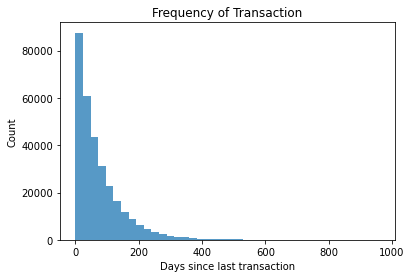

In [99]:
fig =  plt.figure()
plt.hist(last_monthly_purchase_base['days_since_last_txn'],bins=40,alpha=0.75)
plt.title('Frequency of Transaction')
plt.ylabel('Count')
plt.xlabel('Days since last transaction')
plt.show()

From the histogram, the distribution is left skewed, so median is better to describe the average days between transactions. The NaT of days since last transaction is replaced with median. The NaT values of last monthly purchase are computed as ME_DT subtract the median. 

In [100]:
median = last_monthly_purchase_base['days_since_last_txn'].median()

In [101]:
# fill days since last transaction with median
last_monthly_purchase_base['days_since_last_txn'] = last_monthly_purchase_base['days_since_last_txn'].fillna(-10)

In [102]:
# compute date of last monthly purchase
from pandas.tseries.offsets import Day
last_monthly_purchase_base['last_monthly_purchase'] = last_monthly_purchase_base['last_monthly_purchase'].fillna(last_monthly_purchase_base['ME_DT']-Day(median))

In [103]:
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,2011-04-10,-10.0
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


In [104]:
# save as excel
last_monthly_purchase_base[['CLNT_NO','ME_DT','days_since_last_txn']].to_excel('days_since_last_txn.xlsx',index=False)